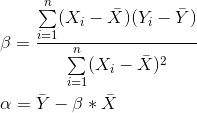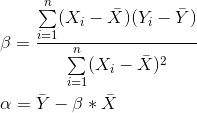

![image.png](attachment:image.png)

where X̄ is the mean of X values and Ȳ is the mean of Y values.

If you are familiar with statistics, you may recognise β as simply
**$ \sum Cov(X, Y) / \sum Var(X) $**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(0)

In [8]:
X = 2.5 * np.random.randn(100) + 1.5 

In [10]:
res = np.random.randn(100) * 0.5

In [11]:
y = X + res

In [13]:
df = pd.DataFrame({'X' : X, 
                   'y' : y} )

In [14]:
df

,X,y
0,0.577045,-0.076218
1,0.901552,1.730617
2,4.249149,4.190067
3,3.138159,2.798070
4,3.100329,3.433520
...,...,...
95,4.342228,3.961482
96,1.744312,2.173274
97,2.957384,3.527935
98,0.501377,1.234667


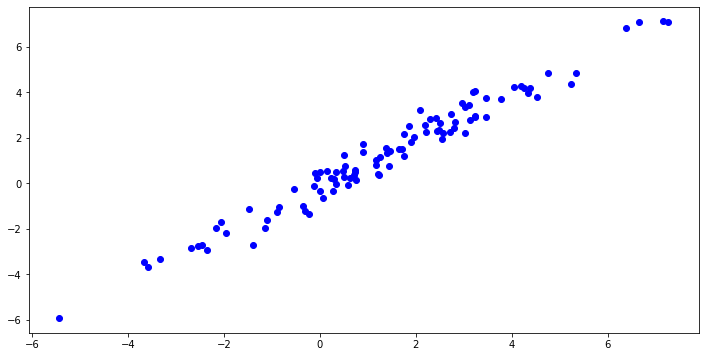

In [21]:
plt.figure(figsize = (12, 6))
_ = plt.plot(df['X'],df['y'], 'bo')

In [24]:
X_mean = np.mean(X)

In [25]:
X_mean

1.351919348600842

In [26]:
y_mean= np.mean(y)

In [28]:
df['xycov'] = (df['X'] - X_mean) * (df['y'] - y_mean)

In [30]:
df['xvar'] = (df['X'] - X_mean) * (df['X'] - X_mean) 

In [31]:
df

,X,y,xycov,xvar
0,0.577045,-0.076218,1.030380,0.600430
1,0.901552,1.730617,-0.214869,0.202831
2,4.249149,4.190067,8.507848,8.393940
3,3.138159,2.798070,2.758936,3.190653
4,3.100329,3.433520,3.811532,3.056936
...,...,...,...,...
95,4.342228,3.961482,8.097641,8.941948
96,1.744312,2.173274,0.360905,0.153972
97,2.957384,3.527935,3.651492,2.577517
98,0.501377,1.234667,0.016036,0.723422


In [32]:
w1 = df['xycov'].sum() / df['xvar'].sum()

In [33]:
w1

1.0247155870416342

In [34]:
w0 = y_mean - (w1 * X_mean)

In [35]:
w0

-0.13181183360656878

In [37]:
y_predict = w0 + w1 * X

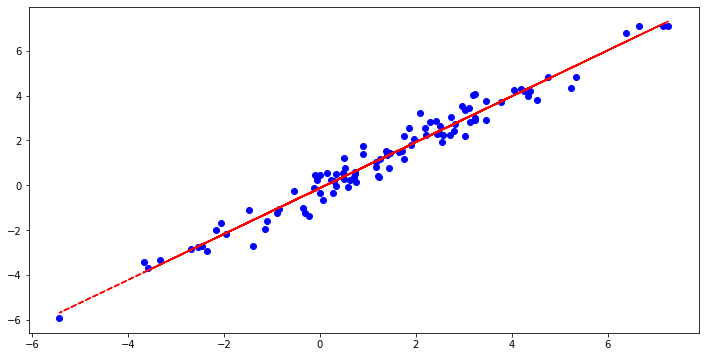

In [39]:
plt.figure(figsize = (12, 6))
_ = plt.plot(df['X'],df['y'], 'bo')

plt.plot(X, y_predict, 'r--')

plt.show()

In [43]:
np.sum((y - y_predict) ** 2) / y.size

0.21246505847750136

## ver 2,sklearn

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
# (1) 构建模型
lm = LinearRegression()
#(2) 训练模型
model = lm.fit(df[['X']], y)
#ver2 
# model = lm.fit(X.reshape(-1,1), y)
model.intercept_  #w0
model.coef_

In [58]:
y_predict2 = model.intercept_  + model.coef_ * X

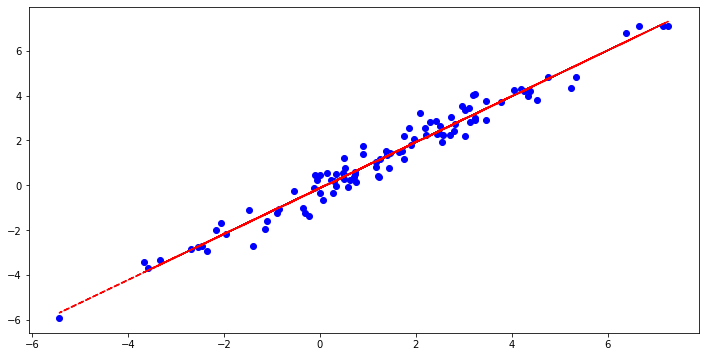

In [59]:
plt.figure(figsize = (12, 6))
_ = plt.plot(df['X'],df['y'], 'bo')

plt.plot(X, y_predict2, 'r--')

plt.show()

In [62]:
model.predict(df[['X']])

array([ 0.45949559,  0.79202261,  4.22235737,  3.08390894,  3.04514343,
       -2.73703861,  1.34294315, -0.48541789,  2.1223693 ,  1.15382096,
        3.73694783,  2.21790767,  3.41966785,  0.21039425, -1.01421045,
        0.35480077,  1.36165884,  2.37656828,  7.19313429,  1.29700764,
       -1.04366781,  0.51892925,  0.21762649,  2.63871547, -2.54193525,
        1.56732543,  1.80619827,  2.00006036, -0.12493617,  0.79575628,
       -2.24288198,  0.14148011,  0.01456501,  2.47109397, -1.55663385,
        3.40652623,  5.23381557, -3.89760325,  2.49724646,  3.13935708,
       -0.22771759,  0.387535  ,  1.06484955,  0.64238416,  0.61363553,
       -2.88830651,  4.35729184,  4.17101655, -0.67840604, -2.35140812,
        2.7401198 , -0.06978572,  1.76891559,  0.58720953,  3.17683789,
        3.18506224, -0.45356581, -2.13862497, -2.64989258,  2.96892471,
       -1.64034498,  0.106905  , -0.12236918,  1.27059523, -3.5550787 ,
        1.88887247,  2.74735979,  1.63178027,  0.60883678,  1.65

In [63]:
from sklearn.metrics import r2_score

In [64]:
r2_score(y_predict2, y)

0.9642789242891322